In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [23]:
#check if gpu exists, need it to optimize run time
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## About the data

###### https://www.cs.toronto.edu/~kriz/cifar.html
#### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

#### The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [10]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


##### training sample is 50000, each sample is a 32 by 32 image, 3RGB channels

In [11]:
y_train[:5]#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)
print(y_train[:5])

[6 9 9 4 1]


In [12]:
y_test = y_test.reshape(-1,)

[6 9 9 4 1]


In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
           

In [20]:
#Let's plot some images to see what they are
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

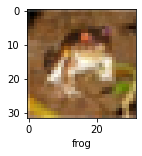

In [21]:
plot_sample(X_train, y_train, 0)


In [ ]:
plot_sample(X_train, y_train, 1)

In [22]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Normalizing the training data

In [26]:
#### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
#### Hence to normalize in 0-->1 range, we need to divide it by 255

X_train = X_train / 255.0
X_test = X_test / 255.0

##  Build ANN model for image classification

In [27]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'), # 3000 neurons
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    #10 for ten categories, softmax normalizes probability
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',#when y is one-hot-encoded vector the use 'categorical_crossentroy' otherwise, 'sparse_categorical_crossentropy'
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8115 - accuracy: 0.3562
Epoch 2/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.6234 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5411 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4828 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4310 - accuracy: 0.4944


#### ANN performs poorly, Accuracy is at 0.4944

In [29]:
### metrics for each class
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.51      0.54      1000
           1       0.44      0.78      0.57      1000
           2       0.27      0.62      0.37      1000
           3       0.45      0.17      0.25      1000
           4       0.51      0.22      0.31      1000
           5       0.52      0.24      0.33      1000
           6       0.52      0.52      0.52      1000
           7       0.64      0.48      0.55      1000
           8       0.54      0.68      0.60      1000
           9       0.58      0.43      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000

